In [1]:
import math 
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='^internal gelsd'
)

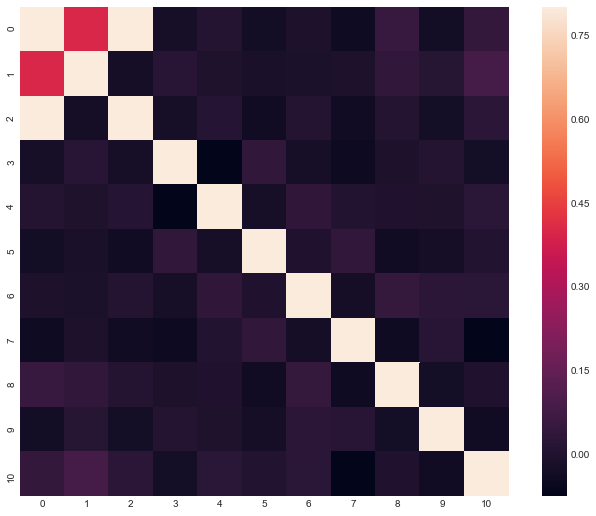

In [19]:
# number of datapoints
n = 1000

# number of features
p = 10

# Create random normal dist data for params
x = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters
y = x[:, 0] + 2 * x[:, 1] + np.random.normal(size=n * 1) + 5

# check the correlations
f, ax = plt.subplots(figsize=(12,9))
corrmat = pd.DataFrame(np.insert(x, 0, y, axis=1)).corr()

# heatmap with sns
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression 0.8301925993393152
R-squared PLSR: 0.8301387015752693


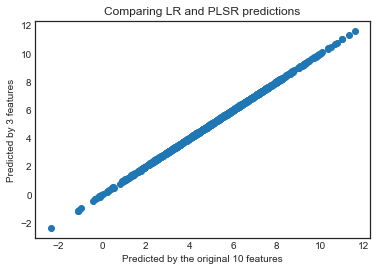

In [20]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

# save predicted values
y_pred = regr.predict(x)
print('R-squared regression', regr.score(x, y))

pls1 = PLSRegression(n_components=2)

# Reduce x to R(x)and regress y
pls1.fit(x, y)

# Save predicted values
y_pls_pred = pls1.predict(x)
print('R-squared PLSR:', pls1.score(x, y))

# compare the predictions of the two models
plt.scatter(y_pred, y_pls_pred)
plt.xlabel('Predicted by the original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

